In [1]:
import pandas as pd
import glob
import re
import string

import warnings
warnings.filterwarnings("ignore")

In [2]:
filelist = glob.glob("csvs/*.csv")

In [3]:
dash = '-' * 90

for i in range(len(filelist)):
    if i == 0:
      print(dash)
      print('{:<40s}{:>20s}{:>20s}'.format('Name','Kommentare Bekommen','Kommentare Zahl'))
      print(dash)
    else:
      df = pd.read_csv(filelist[i-1])
      print('{:<40s}{:>10d}{:>25d}'.format(filelist[i-1], len(df['Kommentare']), df['Zahl der Kommentaren'][0]))

------------------------------------------------------------------------------------------
Name                                     Kommentare Bekommen     Kommentare Zahl
------------------------------------------------------------------------------------------
csvs/KRH Klinikum Lehrte.csv                    87                       87
csvs/Sophienklinik GmbH.csv                    116                      116
csvs/Krankenhaus Lindenbrunn.csv                44                       44
csvs/Asklepios Hospital Göttingen.csv           56                       57
csvs/Augenklinik Dr. Hoffmann.csv              108                      108
csvs/Helios Klinikum Hildesheim.csv            305                      307
csvs/Asklepios Hospital Tiefenbrunn.csv         25                       25
csvs/Krankenhaus Marienstift gGmbH.csv          86                       86
csvs/DIAKOVERE Friederikenstift.csv            264                      264
csvs/DIAKOVERE Annastift.csv                    98   

#### Google Maps CSV's kombinieren

In [4]:
def kombineCSVs(filenames):
    df = pd.concat([pd.read_csv(file, encoding='utf-8') for file in filenames])
    return df

In [5]:
maps_df = kombineCSVs([name for name in filelist])

In [6]:
maps_df.head(3)

,Name,AVG - Sterne,Zahl der Kommentaren,Adresse,Sterne,Kommentare,Datum,Likes
0,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",4,(Translated by Google) My father was admitted ...,a month ago,0
1,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,(Translated by Google) Station 4 is great. I c...,a year ago,2
2,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,(Translated by Google) Everyone was super nice...,a month ago,0


In [7]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1965 non-null   object 
 1   AVG - Sterne          1965 non-null   float64
 2   Zahl der Kommentaren  1965 non-null   int64  
 3   Adresse               1965 non-null   object 
 4   Sterne                1965 non-null   int64  
 5   Kommentare            1445 non-null   object 
 6   Datum                 1965 non-null   object 
 7   Likes                 1965 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 138.2+ KB


In [8]:
maps_df.reset_index(drop=True, inplace=True)

In [9]:
strin = maps_df['Kommentare'][0]
strin

"(Translated by Google) My father was admitted to the intensive care unit in this hospital. The staff did everything to save him. Thanks alot! You are angels on earth.\nOne star, because the communication wasn't so good and some of the sisters were really unfriendly.\n\n(Original)\nMein Vater ist in diesem KH in die Intensivstation eingeliefert worden. Das Personal hat alles getan um.ihn zu retten. Vielen vielen Dank! Ihr seid Engel auf Erden.\nEinen Stern Abzug, weil die Kommunikation nicht so gut war und manche Schwestern echt unfreundlich waren."

#### Bearbeiten von Kommentaren, um gute Ergebnisse aus der Sentimentalyse zu erhalten

##### Unterscheidung zwischen englischen und deutschen Kommentaren

In [10]:
def split_it(df, column):
    english = []
    deutsch = []
    komment_list = []
    df['Regex'] =  [re.split(r"\(Translated by Google\)", str(x)) for x in df[column]]
    for kommentar in df['Regex']:
        try:
            komment = kommentar[1]
            komment_list.append(komment)
        except:
            komment = 'No Comment'
            komment_list.append(komment)

    df['Regex'] =  komment_list
    
    df['Regex'] =  [re.split(r"\(Original\)", str(x)) for x in df['Regex']]
    
    for sprache in df['Regex']:
        try:
            eng = sprache[0]
            de = sprache[1]
            english.append(eng)
            deutsch.append(de)
        except:
            komment = 'No Comment'
            english.append(komment)
            deutsch.append(komment)
    df.drop('Regex', axis=1, inplace= True)
    df['Englisch'] =  english
    df['Deutsch'] =  deutsch 
    
    return df['Englisch'], df['Deutsch']

In [11]:
maps_df['Englisch'], maps_df['Deutsch'] = split_it(maps_df, 'Kommentare')

In [12]:
maps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1965 non-null   object 
 1   AVG - Sterne          1965 non-null   float64
 2   Zahl der Kommentaren  1965 non-null   int64  
 3   Adresse               1965 non-null   object 
 4   Sterne                1965 non-null   int64  
 5   Kommentare            1445 non-null   object 
 6   Datum                 1965 non-null   object 
 7   Likes                 1965 non-null   int64  
 8   Englisch              1965 non-null   object 
 9   Deutsch               1965 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 153.6+ KB


In [13]:
google_maps = maps_df.drop('Kommentare', axis=1)

In [14]:
google_maps.head(2)

,Name,AVG - Sterne,Zahl der Kommentaren,Adresse,Sterne,Datum,Likes,Englisch,Deutsch
0,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",4,a month ago,0,My father was admitted to the intensive care ...,\nMein Vater ist in diesem KH in die Intensivs...
1,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,a year ago,2,Station 4 is great. I came to the emergency r...,\nStation 4 ist super. Ich bin heute Nacht in ...


In [15]:
google_df = google_maps[['Name','Adresse','Sterne','Likes']]

In [16]:
google_df['Likes'] += 1
google_df['Stern_Like'] = google_df['Sterne'] * google_df['Likes']

In [17]:
google_df = google_df.groupby(['Name','Adresse'])['Stern_Like','Likes'].sum()

In [18]:
google_df['Google'] = google_df['Stern_Like'] / google_df['Likes']

In [19]:
columns_to_drop = ['Stern_Like', 'Likes']
google_df = google_df.drop(columns_to_drop, axis=1)

In [20]:
google_df.reset_index(inplace=True)

In [21]:
google_df   # für frontend google rating means...

,Name,Adresse,Google
0,AMEOS Hospital Alfeld,"Landrat-Beushausen-Straße 26, 31061 Alfeld (Le...",2.382979
1,Asklepios Hospital Göttingen,"Rosdorfer Weg 70, 37081 Göttingen",2.128302
2,Asklepios Hospital Tiefenbrunn,"Tiefenbrunn, 37124 Rosdorf",2.563218
3,Augenklinik Dr. Hoffmann,"Wolfenbütteler Str. 82, 38102 Braunschweig",3.970000
4,DIAKOVERE Annastift,"Anna-von-Borries-Straße 1-7, 30625 Hannover",3.593023
5,DIAKOVERE Friederikenstift,"Humboldtstraße 5, 30169 Hannover",2.378788
6,DRK-Krankenhaus Clementinenhaus,"Lützerodestraße 1, 30161 Hannover",3.959233
7,Helios Klinikum Hildesheim,"Senator-Braun-Allee 33, 31135 Hildesheim",2.229777
8,Herzogin Elisabeth Hospital,"Leipziger Str. 24, 38124 Braunschweig",4.143921
9,KRH Klinikum Großburgwedel,"Fuhrberger Str. 8, 30938 Burgwedel",2.526718


##### Entfernen unerwünschter Zeichen aus Kommentaren

In [22]:
google_maps['Englisch'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
google_maps['Deutsch'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 

In [23]:
google_maps['Deutsch'][0]

' Mein Vater ist in diesem KH in die Intensivstation eingeliefert worden. Das Personal hat alles getan um.ihn zu retten. Vielen vielen Dank! Ihr seid Engel auf Erden. Einen Stern Abzug, weil die Kommunikation nicht so gut war und manche Schwestern echt unfreundlich waren.'

In [24]:
google_maps['Adresse'].value_counts()

Senator-Braun-Allee 33, 31135 Hildesheim              305
Saint-Maur-Platz 1, 31785 Hameln                      275
Humboldtstraße 5, 30169 Hannover                      264
Lützerodestraße 1, 30161 Hannover                     178
Leipziger Str. 24, 38124 Braunschweig                 140
Bischofsholer Damm 160, 30173 Hannover                116
Fuhrberger Str. 8, 30938 Burgwedel                    113
Wolfenbütteler Str. 82, 38102 Braunschweig            108
Anna-von-Borries-Straße 1-7, 30625 Hannover            98
Manskestraße 22, 31275 Lehrte                          87
Helmstedter Str. 35, 38102 Braunschweig                86
Landrat-Beushausen-Straße 26, 31061 Alfeld (Leine)     70
Rosdorfer Weg 70, 37081 Göttingen                      56
Am Lindenbrunn 1, 31863 Coppenbrügge                   44
Tiefenbrunn, 37124 Rosdorf                             25
Name: Adresse, dtype: int64

In [25]:
kb_df = pd.read_csv("reviews_lower.csv") #reviews_front.csv

In [26]:
kb_df.head()

,names,reviews,ratings
0,Augenklinik - Dr. Hoffmann,meine laser op grauer star hat super geklappt ...,6
1,Augenklinik - Dr. Hoffmann,bin sehr zufrieden gewesen mit der klinik und ...,6
2,Augenklinik - Dr. Hoffmann,komptentes ärzteteam strickte einhaltung der c...,6
3,Augenklinik - Dr. Hoffmann,ich komme seit einen halben jahr mit meiner be...,6
4,Augenklinik - Dr. Hoffmann,ich war anfang november 2019 zur augenop graue...,6


In [27]:
kb_df['names'].value_counts()

Sana Klinikum Hameln-Pyrmont                                               462
DRK-Clementinenhaus                                                        245
Asklepios Fachklinikum Tiefenbrunn                                         204
HELIOS Klinikum Hildesheim GmbH                                            199
DIAKOVERE Friederikenstift                                                 175
DIAKOVERE Annastift                                                        164
HEH Herzogin Elisabeth Hospital                                            119
KRH Klinikum Großburgwedel                                                  99
Asklepios Fachklinikum Göttingen                                            85
Krankenhaus Lindenbrunn                                                     80
Sophienklinik GmbH                                                          77
Krankenhaus der evangelisch-lutherischen Diakonissenanstalt Marienstift     70
KRH Klinikum Lehrte                                 

In [28]:
google_maps['Name'].value_counts()

Helios Klinikum Hildesheim         305
Sana Klinikum Hameln-Pyrmont       275
DIAKOVERE Friederikenstift         264
DRK-Krankenhaus Clementinenhaus    178
Herzogin Elisabeth Hospital        140
Sophienklinik GmbH                 116
KRH Klinikum Großburgwedel         113
Augenklinik Dr. Hoffmann           108
DIAKOVERE Annastift                 98
KRH Klinikum Lehrte                 87
Krankenhaus Marienstift gGmbH       86
AMEOS Hospital Alfeld               70
Asklepios Hospital Göttingen        56
Krankenhaus Lindenbrunn             44
Asklepios Hospital Tiefenbrunn      25
Name: Name, dtype: int64

In [29]:
kb_df['names'].replace({"HELIOS Klinikum Hildesheim GmbH": "Helios Klinikum Hildesheim",
                        "DRK-Clementinenhaus": "DRK-Krankenhaus Clementinenhaus",
                        "HEH Herzogin Elisabeth Hospital": "Herzogin Elisabeth Hospital",
                        "Augenklinik - Dr. Hoffmann": "Augenklinik Dr. Hoffmann",
                        "Krankenhaus der evangelisch-lutherischen Diakonissenanstalt Marienstift": "Krankenhaus Marienstift gGmbH",
                        "Kreis- und Stadtkrankenhaus Alfeld": "AMEOS Hospital Alfeld",
                        "Asklepios Fachklinikum Göttingen": "Asklepios Hospital Göttingen",
                        "Asklepios Fachklinikum Tiefenbrunn": "Asklepios Hospital Tiefenbrunn",
                       }, 
                       
                       
                       inplace=True)

In [30]:
kb_df.head()

,names,reviews,ratings
0,Augenklinik Dr. Hoffmann,meine laser op grauer star hat super geklappt ...,6
1,Augenklinik Dr. Hoffmann,bin sehr zufrieden gewesen mit der klinik und ...,6
2,Augenklinik Dr. Hoffmann,komptentes ärzteteam strickte einhaltung der c...,6
3,Augenklinik Dr. Hoffmann,ich komme seit einen halben jahr mit meiner be...,6
4,Augenklinik Dr. Hoffmann,ich war anfang november 2019 zur augenop graue...,6


In [31]:
kb_df['funf_sechs'] = kb_df['ratings'] * (5/6)

In [32]:
klinikum_df = kb_df.groupby('names')['funf_sechs'].mean().reset_index()

In [33]:
rename = {'names':'Name',
          'funf_sechs':'Klinikum'
         }

klinikum_df = klinikum_df.rename(index=str, columns=rename)

In [34]:
klinikum_df

,Name,Klinikum
0,AMEOS Hospital Alfeld,1.666667
1,Asklepios Hospital Göttingen,1.431373
2,Asklepios Hospital Tiefenbrunn,2.589869
3,Augenklinik Dr. Hoffmann,3.550725
4,DIAKOVERE Annastift,3.689024
5,DIAKOVERE Friederikenstift,2.542857
6,DRK-Krankenhaus Clementinenhaus,3.653061
7,Helios Klinikum Hildesheim,2.788945
8,Herzogin Elisabeth Hospital,3.907563
9,KRH Klinikum Großburgwedel,2.979798


In [35]:
senti_df = google_maps[['Name', 'Deutsch']]

In [36]:
senti_df.head()

,Name,Deutsch
0,KRH Klinikum Lehrte,Mein Vater ist in diesem KH in die Intensivst...
1,KRH Klinikum Lehrte,Station 4 ist super. Ich bin heute Nacht in d...
2,KRH Klinikum Lehrte,Alle super nett und hilfsbereit. Trotz sponta...
3,KRH Klinikum Lehrte,Wenn ich das alles hier lese. Ich komme hier ...
4,KRH Klinikum Lehrte,Mein Mann wurde im Oktober 2016 von Dr.Fremer...


In [37]:
senti_df.shape

(1965, 2)

In [38]:
rename = {'names':'Name',
         'reviews':'Deutsch'
         }

kb_df = kb_df.rename(index=str, columns=rename)

#no need for two index columns.
kb_df = kb_df.reset_index(drop=True)

In [39]:
kb_df.head()

,Name,Deutsch,ratings,funf_sechs
0,Augenklinik Dr. Hoffmann,meine laser op grauer star hat super geklappt ...,6,5.0
1,Augenklinik Dr. Hoffmann,bin sehr zufrieden gewesen mit der klinik und ...,6,5.0
2,Augenklinik Dr. Hoffmann,komptentes ärzteteam strickte einhaltung der c...,6,5.0
3,Augenklinik Dr. Hoffmann,ich komme seit einen halben jahr mit meiner be...,6,5.0
4,Augenklinik Dr. Hoffmann,ich war anfang november 2019 zur augenop graue...,6,5.0


In [40]:
kb_senti = kb_df[['Name', 'Deutsch']]

In [41]:
df_zusammen = pd.concat([senti_df, kb_senti], ignore_index=True, sort=False)

In [42]:
df_zusammen.shape

(4026, 2)

In [43]:
df_zusammen['Name'].value_counts()

Sana Klinikum Hameln-Pyrmont       737
Helios Klinikum Hildesheim         504
DIAKOVERE Friederikenstift         439
DRK-Krankenhaus Clementinenhaus    423
DIAKOVERE Annastift                262
Herzogin Elisabeth Hospital        259
Asklepios Hospital Tiefenbrunn     229
KRH Klinikum Großburgwedel         212
Sophienklinik GmbH                 193
Krankenhaus Marienstift gGmbH      156
Asklepios Hospital Göttingen       141
KRH Klinikum Lehrte                137
Augenklinik Dr. Hoffmann           131
Krankenhaus Lindenbrunn            124
AMEOS Hospital Alfeld               79
Name: Name, dtype: int64

In [44]:
df_zusammen['Deutsch'].value_counts()

diese bewertung geht nicht in die gesamtbewertung ein                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       815
No Comme

In [45]:
'''Löschen Kommentare, die nur Stern bewertung haben'''

sentiment_df = df_zusammen[(df_zusammen.Deutsch != 'diese bewertung geht nicht in die gesamtbewertung ein') & (df_zusammen.Deutsch != 'No Comment')]

### wie viele Bewertungen hat ein Krankenhaus erhalten 

In [46]:
z = sentiment_df['Name'].value_counts() 

z1 = z.to_dict() #converts to dictionary

sentiment_df['Kommentare_Zahl'] = sentiment_df['Name'].map(z1) 

In [47]:
sentiment_df.head()

,Name,Deutsch,Kommentare_Zahl
0,KRH Klinikum Lehrte,Mein Vater ist in diesem KH in die Intensivst...,92
1,KRH Klinikum Lehrte,Station 4 ist super. Ich bin heute Nacht in d...,92
2,KRH Klinikum Lehrte,Alle super nett und hilfsbereit. Trotz sponta...,92
3,KRH Klinikum Lehrte,Wenn ich das alles hier lese. Ich komme hier ...,92
4,KRH Klinikum Lehrte,Mein Mann wurde im Oktober 2016 von Dr.Fremer...,92


In [48]:
sentiment_df.shape

(2664, 3)

## Sentimenanalyse

In [49]:
import textblob # Sentiment Analyse
from textblob_de import TextBlobDE
# from textblob import TextBlob

In [50]:
def clean_data(speech):
    # Make text lowercase
    speech = speech.lower() 
    
    # remove text in square brackets
    speech = re.sub('\[.*?\]', '', speech) 
    
    # remove punctuation
    speech = re.sub('[%s]' % re.escape(string.punctuation), '', speech) 
    
    # remove words containing numbers
    speech = re.sub('\w*\d\w*', '', speech)
    
    # Get rid of some additional punctuation
    speech = re.sub('[‘’“”…]', '', speech)
    
    # at last get rid of remaining non-sensical text.
    speech = re.sub('[\n]', ' ', speech) 
    
    return speech

clearance = lambda x: clean_data(x)

In [51]:
# um optimale Ergebnisse aus der Sentimentanalyse zu erhalten.
#google_maps['Deutsch'] = google_maps['Deutsch'].str
sentiment_df['Deutsch'] = pd.DataFrame(sentiment_df.Deutsch.apply(clearance))

In [52]:
sentiment_df['Deutsch'].head()

0     mein vater ist in diesem kh in die intensivst...
1     station  ist super ich bin heute nacht in die...
2     alle super nett und hilfsbereit trotz spontan...
3     wenn ich das alles hier lese ich komme hier n...
4     mein mann wurde im oktober  von drfremerey op...
Name: Deutsch, dtype: object

In [53]:
'''Bei diesen Funktionen mit TextBlob werden wir 'Polaritywerten' von allen Kommentaren  erhalten.  '''

def senti_deutsch(x):
    return TextBlobDE(x).sentiment.polarity # TextBlobDE ist für deutsche Texte geignet.

In [54]:
sentiment_df['Senti_Score'] = sentiment_df['Deutsch'].apply(senti_deutsch)

In [55]:
sentiment_df.head(2)

,Name,Deutsch,Kommentare_Zahl,Senti_Score
0,KRH Klinikum Lehrte,mein vater ist in diesem kh in die intensivst...,92,0.0
1,KRH Klinikum Lehrte,station ist super ich bin heute nacht in die...,92,0.9


## Machine Learning

### K-Means Clustering

In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

##### Pre - Processing

Wie gesehen, sind einige Variablen in diesem Datensatz kategoriale Variable. Der k-means-Algorithmus ist nicht direkt auf kategoriale Variablen anwendbar, da die euklidische Distanzfunktion für diskrete Variablen nicht wirklich von Bedeutung ist. Lassen Sie uns diese Funktion löschen und das Clustering ausführen.

In [57]:
sentiment_df.head()

,Name,Deutsch,Kommentare_Zahl,Senti_Score
0,KRH Klinikum Lehrte,mein vater ist in diesem kh in die intensivst...,92,0.000000
1,KRH Klinikum Lehrte,station ist super ich bin heute nacht in die...,92,0.900000
2,KRH Klinikum Lehrte,alle super nett und hilfsbereit trotz spontan...,92,0.433333
3,KRH Klinikum Lehrte,wenn ich das alles hier lese ich komme hier n...,92,1.000000
4,KRH Klinikum Lehrte,mein mann wurde im oktober von drfremerey op...,92,0.660000


In [58]:
sentiment_ml = sentiment_df.groupby(['Name','Kommentare_Zahl'])['Senti_Score'].mean().reset_index()

In [59]:
sentiment_ml['Senti_Zahl'] = (sentiment_ml['Kommentare_Zahl'] / sentiment_ml['Kommentare_Zahl'].max()) * sentiment_ml['Senti_Score']

In [60]:
sentiment_ml

,Name,Kommentare_Zahl,Senti_Score,Senti_Zahl
0,AMEOS Hospital Alfeld,55,0.292581,0.032248
1,Asklepios Hospital Göttingen,97,0.018649,0.003625
2,Asklepios Hospital Tiefenbrunn,103,0.296610,0.061224
3,Augenklinik Dr. Hoffmann,113,0.594427,0.134610
4,DIAKOVERE Annastift,147,0.440920,0.129890
5,DIAKOVERE Friederikenstift,293,0.237555,0.139486
6,DRK-Krankenhaus Clementinenhaus,303,0.525759,0.319249
7,Helios Klinikum Hildesheim,331,0.275147,0.182512
8,Herzogin Elisabeth Hospital,182,0.544598,0.198631
9,KRH Klinikum Großburgwedel,152,0.297909,0.090746


In [61]:
sentiment_ml['Kommentare_Zahl'].sum()

2664

In [62]:
sentiment = sentiment_ml[['Name','Senti_Zahl']]

In [63]:
# clustering = pd.concat([sentiment, google_df.reindex(sentiment.index)], axis=1)
clustering = pd.merge(google_df, sentiment, on="Name")

In [64]:
clustering = pd.merge(clustering, klinikum_df, on="Name")

In [65]:
clustering

,Name,Adresse,Google,Senti_Zahl,Klinikum
0,AMEOS Hospital Alfeld,"Landrat-Beushausen-Straße 26, 31061 Alfeld (Le...",2.382979,0.032248,1.666667
1,Asklepios Hospital Göttingen,"Rosdorfer Weg 70, 37081 Göttingen",2.128302,0.003625,1.431373
2,Asklepios Hospital Tiefenbrunn,"Tiefenbrunn, 37124 Rosdorf",2.563218,0.061224,2.589869
3,Augenklinik Dr. Hoffmann,"Wolfenbütteler Str. 82, 38102 Braunschweig",3.970000,0.134610,3.550725
4,DIAKOVERE Annastift,"Anna-von-Borries-Straße 1-7, 30625 Hannover",3.593023,0.129890,3.689024
5,DIAKOVERE Friederikenstift,"Humboldtstraße 5, 30169 Hannover",2.378788,0.139486,2.542857
6,DRK-Krankenhaus Clementinenhaus,"Lützerodestraße 1, 30161 Hannover",3.959233,0.319249,3.653061
7,Helios Klinikum Hildesheim,"Senator-Braun-Allee 33, 31135 Hildesheim",2.229777,0.182512,2.788945
8,Herzogin Elisabeth Hospital,"Leipziger Str. 24, 38124 Braunschweig",4.143921,0.198631,3.907563
9,KRH Klinikum Großburgwedel,"Fuhrberger Str. 8, 30938 Burgwedel",2.526718,0.090746,2.979798


In [66]:
Clus_dataSet =  clustering[['Google','Senti_Zahl', 'Klinikum']] # 'Senti_Zahl'

In [67]:
Clus_Normalized = Clus_dataSet
Clus_Normalized['Google'] = Clus_Normalized['Google'] / Clus_Normalized['Google'].max()
Clus_Normalized['Senti_Zahl'] = Clus_Normalized['Senti_Zahl'] / Clus_Normalized['Senti_Zahl'].max()
Clus_Normalized['Klinikum'] = Clus_Normalized['Klinikum'] / Clus_Normalized['Klinikum'].max()
Clus_Normalized

,Google,Senti_Zahl,Klinikum
0,0.575054,0.101014,0.416667
1,0.513596,0.011355,0.357843
2,0.618549,0.191776,0.647467
3,0.958030,0.421645,0.887681
4,0.867059,0.406863,0.922256
5,0.574043,0.436920,0.635714
6,0.955432,1.000000,0.913265
7,0.538084,0.571693,0.697236
8,1.000000,0.622182,0.976891
9,0.609741,0.284248,0.744949


In [68]:
'''from sklearn.preprocessing import StandardScaler
X = Clus_dataSet.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet'''

'from sklearn.preprocessing import StandardScaler\nX = Clus_dataSet.values[:,1:]\nX = np.nan_to_num(X)\nClus_dataSet = StandardScaler().fit_transform(X)\nClus_dataSet'

### Modeling

Es wäre dasselbe wie zu erraten, dass jede Klinikgruppe bestimmte Sterne, Likes, Sentimentswerte usw. mit mehreren Tests und Experimenten haben würde. Mit dem K-Means-Clustering können wir diesen Vorgang jedoch viel einfacher durchführen.

In [69]:
from yellowbrick.cluster import KElbowVisualizer

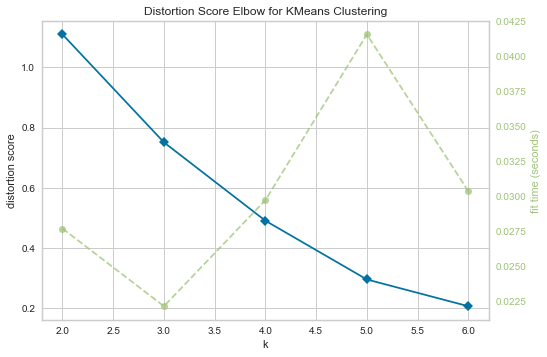

In [72]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,7))
visu.fit(Clus_Normalized)
visu.poof();

In [74]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_Normalized)
labels = k_means.labels_
print(labels)

[3 3 1 0 0 1 2 1 0 1 1 1 0 2 0]


In [75]:
clustering["Clusters"] = labels

In [76]:
clustering

,Name,Adresse,Google,Senti_Zahl,Klinikum,Clusters
0,AMEOS Hospital Alfeld,"Landrat-Beushausen-Straße 26, 31061 Alfeld (Le...",2.382979,0.032248,1.666667,3
1,Asklepios Hospital Göttingen,"Rosdorfer Weg 70, 37081 Göttingen",2.128302,0.003625,1.431373,3
2,Asklepios Hospital Tiefenbrunn,"Tiefenbrunn, 37124 Rosdorf",2.563218,0.061224,2.589869,1
3,Augenklinik Dr. Hoffmann,"Wolfenbütteler Str. 82, 38102 Braunschweig",3.970000,0.134610,3.550725,0
4,DIAKOVERE Annastift,"Anna-von-Borries-Straße 1-7, 30625 Hannover",3.593023,0.129890,3.689024,0
5,DIAKOVERE Friederikenstift,"Humboldtstraße 5, 30169 Hannover",2.378788,0.139486,2.542857,1
6,DRK-Krankenhaus Clementinenhaus,"Lützerodestraße 1, 30161 Hannover",3.959233,0.319249,3.653061,2
7,Helios Klinikum Hildesheim,"Senator-Braun-Allee 33, 31135 Hildesheim",2.229777,0.182512,2.788945,1
8,Herzogin Elisabeth Hospital,"Leipziger Str. 24, 38124 Braunschweig",4.143921,0.198631,3.907563,0
9,KRH Klinikum Großburgwedel,"Fuhrberger Str. 8, 30938 Burgwedel",2.526718,0.090746,2.979798,1


In [84]:
clustering['Klinify'] = clustering['Clusters']

In [85]:
replace_values = {0:4, 3:1, 1:2, 2:3 }                                                                                          

clustering = clustering.replace({"Klinify": replace_values}) 

In [120]:
clustering["id"] = clustering.index 

In [121]:
clustering

,Name,Adresse,Google,Senti_Zahl,Klinikum,Clusters,Klinify,stadt,id
0,AMEOS Hospital Alfeld,"Landrat-Beushausen-Straße 26, 31061 Alfeld (Le...",2.382979,0.032248,1.666667,3,1,Alfeld (Leine),0
1,Asklepios Hospital Göttingen,"Rosdorfer Weg 70, 37081 Göttingen",2.128302,0.003625,1.431373,3,1,Göttingen,1
2,Asklepios Hospital Tiefenbrunn,"Tiefenbrunn, 37124 Rosdorf",2.563218,0.061224,2.589869,1,2,Rosdorf,2
3,Augenklinik Dr. Hoffmann,"Wolfenbütteler Str. 82, 38102 Braunschweig",3.970000,0.134610,3.550725,0,4,Braunschweig,3
4,DIAKOVERE Annastift,"Anna-von-Borries-Straße 1-7, 30625 Hannover",3.593023,0.129890,3.689024,0,4,Hannover,4
5,DIAKOVERE Friederikenstift,"Humboldtstraße 5, 30169 Hannover",2.378788,0.139486,2.542857,1,2,Hannover,5
6,DRK-Krankenhaus Clementinenhaus,"Lützerodestraße 1, 30161 Hannover",3.959233,0.319249,3.653061,2,3,Hannover,6
7,Helios Klinikum Hildesheim,"Senator-Braun-Allee 33, 31135 Hildesheim",2.229777,0.182512,2.788945,1,2,Hildesheim,7
8,Herzogin Elisabeth Hospital,"Leipziger Str. 24, 38124 Braunschweig",4.143921,0.198631,3.907563,0,4,Braunschweig,8
9,KRH Klinikum Großburgwedel,"Fuhrberger Str. 8, 30938 Burgwedel",2.526718,0.090746,2.979798,1,2,Burgwedel,9


## JSON for Main Page

In [122]:
#clustering['Stadt'] = clustering['Stadt'].split()[-1]
stadt_list = []
for stadt in clustering['Adresse']:
    stadt = stadt.split()
    if stadt[-1] != '(Leine)':
        stadt_list.append(stadt[-1])
    else:
        stadt_list.append(stadt[-2] + ' ' + stadt[-1])
        
stadt_list

['Alfeld (Leine)',
 'Göttingen',
 'Rosdorf',
 'Braunschweig',
 'Hannover',
 'Hannover',
 'Hannover',
 'Hildesheim',
 'Braunschweig',
 'Burgwedel',
 'Lehrte',
 'Coppenbrügge',
 'Braunschweig',
 'Hameln',
 'Hannover']

In [123]:
clustering['stadt'] = stadt_list

In [124]:
main_json_df = clustering[['id','Name', 'Adresse', 'stadt','Google','Klinikum','Klinify']]

In [125]:
main_json_df

,id,Name,Adresse,stadt,Google,Klinikum,Klinify
0,0,AMEOS Hospital Alfeld,"Landrat-Beushausen-Straße 26, 31061 Alfeld (Le...",Alfeld (Leine),2.382979,1.666667,1
1,1,Asklepios Hospital Göttingen,"Rosdorfer Weg 70, 37081 Göttingen",Göttingen,2.128302,1.431373,1
2,2,Asklepios Hospital Tiefenbrunn,"Tiefenbrunn, 37124 Rosdorf",Rosdorf,2.563218,2.589869,2
3,3,Augenklinik Dr. Hoffmann,"Wolfenbütteler Str. 82, 38102 Braunschweig",Braunschweig,3.970000,3.550725,4
4,4,DIAKOVERE Annastift,"Anna-von-Borries-Straße 1-7, 30625 Hannover",Hannover,3.593023,3.689024,4
5,5,DIAKOVERE Friederikenstift,"Humboldtstraße 5, 30169 Hannover",Hannover,2.378788,2.542857,2
6,6,DRK-Krankenhaus Clementinenhaus,"Lützerodestraße 1, 30161 Hannover",Hannover,3.959233,3.653061,3
7,7,Helios Klinikum Hildesheim,"Senator-Braun-Allee 33, 31135 Hildesheim",Hildesheim,2.229777,2.788945,2
8,8,Herzogin Elisabeth Hospital,"Leipziger Str. 24, 38124 Braunschweig",Braunschweig,4.143921,3.907563,4
9,9,KRH Klinikum Großburgwedel,"Fuhrberger Str. 8, 30938 Burgwedel",Burgwedel,2.526718,2.979798,2


In [126]:
main_json_df = main_json_df.round(1)

In [128]:
with open('main.json', 'w', encoding='utf-8') as file:
    main_json_df.to_json(file, orient="records", force_ascii=False)

## JSON for Reviews

In [129]:
google_maps.head()

,Name,AVG - Sterne,Zahl der Kommentaren,Adresse,Sterne,Datum,Likes,Englisch,Deutsch
0,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",4,a month ago,0,My father was admitted to the intensive care ...,Mein Vater ist in diesem KH in die Intensivst...
1,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,a year ago,2,Station 4 is great. I came to the emergency r...,Station 4 ist super. Ich bin heute Nacht in d...
2,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,a month ago,0,Everyone was super nice and helpful. Despite ...,Alle super nett und hilfsbereit. Trotz sponta...
3,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,2 months ago,2,When I read all of this I don't come here for...,Wenn ich das alles hier lese. Ich komme hier ...
4,KRH Klinikum Lehrte,3.3,87,"Manskestraße 22, 31275 Lehrte",5,a month ago,0,My husband was operated on by Dr Remerey in O...,Mein Mann wurde im Oktober 2016 von Dr.Fremer...


In [160]:
google_reviews = google_maps[['Name','Sterne', 'Datum', 'Deutsch']]

In [163]:
google_reviews['Von'] = 'Google'

In [164]:
google_reviews.head()

,Name,Sterne,Datum,Deutsch,Von
0,KRH Klinikum Lehrte,4,a month ago,Mein Vater ist in diesem KH in die Intensivst...,Google
1,KRH Klinikum Lehrte,5,a year ago,Station 4 ist super. Ich bin heute Nacht in d...,Google
2,KRH Klinikum Lehrte,5,a month ago,Alle super nett und hilfsbereit. Trotz sponta...,Google
3,KRH Klinikum Lehrte,5,2 months ago,Wenn ich das alles hier lese. Ich komme hier ...,Google
4,KRH Klinikum Lehrte,5,a month ago,Mein Mann wurde im Oktober 2016 von Dr.Fremer...,Google


In [147]:
klinik_reviews = pd.read_csv('kliniks_reviews10.csv')

In [149]:
klinik_reviews.shape

(2061, 6)

In [150]:
klinik_reviews_2 = pd.read_csv('reviews_front.csv')

In [154]:
klinik_reviews_2.head()

,reviews,ratings
0,Meine Laser OP grauer Star hat super geklappt....,6
1,Bin sehr zufrieden gewesen mit der Klinik und ...,6
2,Komptentes Ärzteteam.Strickte Einhaltung der C...,6
3,Ich komme seit einen halben Jahr mit meiner be...,6
4,Ich war Anfang November 2019 zur Augen-OP (Gra...,6


In [155]:
result_klinik = pd.concat([klinik_reviews, klinik_reviews_2], axis=1)

In [165]:
result_klinik = result_klinik[['Name','ratings', 'Date', 'reviews']]
result_klinik['Von'] = 'klinikbewertungen.de'
result_klinik

,Name,ratings,Date,reviews,Von
0,Augenklinik Dr. Hoffmann,6,16.03.2021,Meine Laser OP grauer Star hat super geklappt....,klinikbewertungen.de
1,Augenklinik Dr. Hoffmann,6,20.01.2021,Bin sehr zufrieden gewesen mit der Klinik und ...,klinikbewertungen.de
2,Augenklinik Dr. Hoffmann,6,16.11.2020,Komptentes Ärzteteam.Strickte Einhaltung der C...,klinikbewertungen.de
3,Augenklinik Dr. Hoffmann,6,22.03.2020,Ich komme seit einen halben Jahr mit meiner be...,klinikbewertungen.de
4,Augenklinik Dr. Hoffmann,6,14.11.2019,Ich war Anfang November 2019 zur Augen-OP (Gra...,klinikbewertungen.de
...,...,...,...,...,...
2056,Helios Klinikum Hildesheim,6,18.04.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de
2057,Helios Klinikum Hildesheim,6,15.03.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de
2058,Helios Klinikum Hildesheim,6,12.03.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de
2059,Helios Klinikum Hildesheim,6,08.02.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de


In [167]:
google_reviews.head(2)

,Name,Sterne,Datum,Deutsch,Von
0,KRH Klinikum Lehrte,4,a month ago,Mein Vater ist in diesem KH in die Intensivst...,Google
1,KRH Klinikum Lehrte,5,a year ago,Station 4 ist super. Ich bin heute Nacht in d...,Google


In [168]:
rename = {'ratings':'Sterne',
         'Date':'Datum',
         'reviews':'Deutsch'
         }

result_klinik = result_klinik.rename(columns=rename)

In [158]:
result_klinik['Name'].replace({"HELIOS Klinikum Hildesheim GmbH": "Helios Klinikum Hildesheim",
                        "DRK-Clementinenhaus": "DRK-Krankenhaus Clementinenhaus",
                        "HEH Herzogin Elisabeth Hospital": "Herzogin Elisabeth Hospital",
                        "Augenklinik - Dr. Hoffmann": "Augenklinik Dr. Hoffmann",
                        "Krankenhaus der evangelisch-lutherischen Diakonissenanstalt Marienstift": "Krankenhaus Marienstift gGmbH",
                        "Kreis- und Stadtkrankenhaus Alfeld": "AMEOS Hospital Alfeld",
                        "Asklepios Fachklinikum Göttingen": "Asklepios Hospital Göttingen",
                        "Asklepios Fachklinikum Tiefenbrunn": "Asklepios Hospital Tiefenbrunn",
                       }, 
                       
                       
                       inplace=True)

In [169]:
result_klinik.head()

,Name,Sterne,Datum,Deutsch,Von
0,Augenklinik Dr. Hoffmann,6,16.03.2021,Meine Laser OP grauer Star hat super geklappt....,klinikbewertungen.de
1,Augenklinik Dr. Hoffmann,6,20.01.2021,Bin sehr zufrieden gewesen mit der Klinik und ...,klinikbewertungen.de
2,Augenklinik Dr. Hoffmann,6,16.11.2020,Komptentes Ärzteteam.Strickte Einhaltung der C...,klinikbewertungen.de
3,Augenklinik Dr. Hoffmann,6,22.03.2020,Ich komme seit einen halben Jahr mit meiner be...,klinikbewertungen.de
4,Augenklinik Dr. Hoffmann,6,14.11.2019,Ich war Anfang November 2019 zur Augen-OP (Gra...,klinikbewertungen.de


In [170]:
frames = [google_reviews, result_klinik]
All_Reviews = pd.concat(frames, ignore_index=True)

In [171]:
All_Reviews.shape

(4026, 5)

In [172]:
All_Reviews.head()

,Name,Sterne,Datum,Deutsch,Von
0,KRH Klinikum Lehrte,4,a month ago,Mein Vater ist in diesem KH in die Intensivst...,Google
1,KRH Klinikum Lehrte,5,a year ago,Station 4 ist super. Ich bin heute Nacht in d...,Google
2,KRH Klinikum Lehrte,5,a month ago,Alle super nett und hilfsbereit. Trotz sponta...,Google
3,KRH Klinikum Lehrte,5,2 months ago,Wenn ich das alles hier lese. Ich komme hier ...,Google
4,KRH Klinikum Lehrte,5,a month ago,Mein Mann wurde im Oktober 2016 von Dr.Fremer...,Google


In [173]:
All_Reviews['review_id'] = All_Reviews.index

In [174]:
klinik_ids = main_json_df[['Name', 'id']]

In [175]:
klinik_ids_dict = pd.Series(klinik_ids.id.values,index=klinik_ids.Name).to_dict()

In [176]:
klinik_ids_dict

{'AMEOS Hospital Alfeld': 0,
 'Asklepios Hospital Göttingen': 1,
 'Asklepios Hospital Tiefenbrunn': 2,
 'Augenklinik Dr. Hoffmann': 3,
 'DIAKOVERE Annastift': 4,
 'DIAKOVERE Friederikenstift': 5,
 'DRK-Krankenhaus Clementinenhaus': 6,
 'Helios Klinikum Hildesheim': 7,
 'Herzogin Elisabeth Hospital': 8,
 'KRH Klinikum Großburgwedel': 9,
 'KRH Klinikum Lehrte': 10,
 'Krankenhaus Lindenbrunn': 11,
 'Krankenhaus Marienstift gGmbH': 12,
 'Sana Klinikum Hameln-Pyrmont': 13,
 'Sophienklinik GmbH': 14}

In [177]:
All_Reviews['klinik_id'] = All_Reviews['Name'].map(klinik_ids_dict)

In [179]:
All_Reviews = All_Reviews[['klinik_id','review_id','Name','Sterne','Datum','Deutsch','Von']]

In [180]:
All_Reviews.head()

,klinik_id,review_id,Name,Sterne,Datum,Deutsch,Von
0,10,0,KRH Klinikum Lehrte,4,a month ago,Mein Vater ist in diesem KH in die Intensivst...,Google
1,10,1,KRH Klinikum Lehrte,5,a year ago,Station 4 ist super. Ich bin heute Nacht in d...,Google
2,10,2,KRH Klinikum Lehrte,5,a month ago,Alle super nett und hilfsbereit. Trotz sponta...,Google
3,10,3,KRH Klinikum Lehrte,5,2 months ago,Wenn ich das alles hier lese. Ich komme hier ...,Google
4,10,4,KRH Klinikum Lehrte,5,a month ago,Mein Mann wurde im Oktober 2016 von Dr.Fremer...,Google


In [182]:
All_Reviews.set_index('klinik_id', inplace=True)

In [183]:
All_Reviews

,review_id,Name,Sterne,Datum,Deutsch,Von
klinik_id,,,,,,
10,0,KRH Klinikum Lehrte,4,a month ago,Mein Vater ist in diesem KH in die Intensivst...,Google
10,1,KRH Klinikum Lehrte,5,a year ago,Station 4 ist super. Ich bin heute Nacht in d...,Google
10,2,KRH Klinikum Lehrte,5,a month ago,Alle super nett und hilfsbereit. Trotz sponta...,Google
10,3,KRH Klinikum Lehrte,5,2 months ago,Wenn ich das alles hier lese. Ich komme hier ...,Google
10,4,KRH Klinikum Lehrte,5,a month ago,Mein Mann wurde im Oktober 2016 von Dr.Fremer...,Google
...,...,...,...,...,...,...
7,4021,Helios Klinikum Hildesheim,6,18.04.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de
7,4022,Helios Klinikum Hildesheim,6,15.03.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de
7,4023,Helios Klinikum Hildesheim,6,12.03.2008,Diese Bewertung geht nicht in die Gesamtbewert...,klinikbewertungen.de


In [185]:
cols_as_dict = All_Reviews.apply(dict, axis=1)

In [187]:
combined = cols_as_dict.groupby(cols_as_dict.index).apply(list)

In [188]:
with open('reviews.json', 'w', encoding='utf-8') as file:
    combined.to_json(file, force_ascii=False)